In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='D2coding')

# csv파일 읽어오기

In [2]:
place_df = pd.read_csv('장소데이터.csv')
place_info_df = pd.read_csv('장소정보데이터.csv')
people_activate = pd.read_csv('연령대별_평균시간_20230525183401.csv', encoding='cp949')

# 데이터 분석

In [3]:
place_df[:5]

,수집일시,장소,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10,강남 MICE 관광특구,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10,동대문 관광특구,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10,명동 관광특구,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10,이태원 관광특구,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10,잠실 관광특구,30000,28000,10.8,40.5,32.4,16.2


In [4]:
place_info_df[:2]

,수집일시,장소,기온,체감온도,강수량,미세먼지지표,전체도로평균속도,전체도로평균속도현황
0,2023-05-20 10,강남 MICE 관광특구,24.1,24.2,-,좋음,16,서행
1,2023-05-20 10,동대문 관광특구,24.0,24.5,-,좋음,20,서행


In [5]:
people_activate[:5]
# 요일평균, 평일, 토요일, 일요일이 중복되고 그 아래에 계, 남자, 여자가 존재하고 연령대별과 행동분류도 중복되기 때문에 멀티인덱스로 만듦

,연령대별,행동분류별,2019,2019.1,2019.2
0,연령대별,행동분류별,평일,토요일,일요일
1,연령대별,행동분류별,계,계,계
2,10~19세(10대),개인유지,11:17,12:46,13:03
3,10~19세(10대),일,0:15,0:18,0:13
4,10~19세(10대),학습,6:38,2:32,2:19


In [6]:
place_df.info()
# 결측치 없고 수집일시의 dtype만 날짜 dtype인 datetime으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수집일시    4250 non-null   object 
 1   장소      4250 non-null   object 
 2   최대인구    4250 non-null   int64  
 3   최소인구    4250 non-null   int64  
 4   10대     4250 non-null   float64
 5   2030대   4250 non-null   float64
 6   4050대   4250 non-null   float64
 7   6070대   4250 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 265.8+ KB


In [7]:
place_info_df.info()
# 결측치 없고 수집일시의 dtype만 날짜 dtype인 datetime으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   수집일시        4250 non-null   object 
 1   장소          4250 non-null   object 
 2   기온          4250 non-null   float64
 3   체감온도        4250 non-null   float64
 4   강수량         4250 non-null   object 
 5   미세먼지지표      4250 non-null   object 
 6   전체도로평균속도    4250 non-null   int64  
 7   전체도로평균속도현황  4250 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 265.8+ KB


In [8]:
people_activate.info()
# dtype을 float으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령대별    56 non-null     object
 1   행동분류별   56 non-null     object
 2   2019    56 non-null     object
 3   2019.1  56 non-null     object
 4   2019.2  56 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


# 전처리
- 수집한 데이터 중 24일 데이터 삭제
- 수집한 데이터 중 수집일시의 dtype을 datetime64[ns]로 변경
<BR><BR>
- [place_df]
    - 장소분류 추가
    - 인수수 컬럼 추가(최대인구+최소인구의 평균)
<BR><BR>
- [people_activate]
    - 멀티인덱스 설정
    - dtype float으로 변경

## 수집일시의 dtype 변경

In [9]:
place_df.수집일시 = place_df.수집일시.astype('datetime64[ns]')
place_info_df.수집일시 = place_info_df.수집일시.astype('datetime64[ns]')

In [10]:
place_df.dtypes

수집일시     datetime64[ns]
장소               object
최대인구              int64
최소인구              int64
10대             float64
2030대           float64
4050대           float64
6070대           float64
dtype: object

In [11]:
place_info_df.dtypes

수집일시          datetime64[ns]
장소                    object
기온                   float64
체감온도                 float64
강수량                   object
미세먼지지표                object
전체도로평균속도               int64
전체도로평균속도현황            object
dtype: object

## 수집일이 24인 데이터 삭제

In [12]:
# 24일 데이터의 index 추출
drop_data = place_df.수집일시[place_df.수집일시.dt.day==24].index

In [13]:
# 24일 데이터의 index로 행 삭제
place_df.drop(index=drop_data).수집일시

0      2023-05-20 10:00:00
1      2023-05-20 10:00:00
2      2023-05-20 10:00:00
3      2023-05-20 10:00:00
4      2023-05-20 10:00:00
               ...        
3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, Length: 3850, dtype: datetime64[ns]

In [14]:
# 24일 데이터의 index로 행 삭제 원본적용
place_df.drop(index=drop_data, inplace=True)

In [15]:
place_df.수집일시.tail()

3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, dtype: datetime64[ns]

In [16]:
# 24일 데이터의 index 추출
drop_data = place_info_df.수집일시[place_info_df.수집일시.dt.day==24].index

In [17]:
# 24일 데이터의 index로 행 삭제
place_info_df.수집일시.drop(index=drop_data)

0      2023-05-20 10:00:00
1      2023-05-20 10:00:00
2      2023-05-20 10:00:00
3      2023-05-20 10:00:00
4      2023-05-20 10:00:00
               ...        
3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, Length: 3850, dtype: datetime64[ns]

In [18]:
# 24일 데이터의 index로 행 삭제 원본적용
place_info_df.drop(index=drop_data, inplace=True)

In [19]:
place_info_df.수집일시.tail()

3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, dtype: datetime64[ns]

## place_df에 장소분류 컬럼 추가
- 관광특구
- 고궁문화유산
- 공원
- 발달상권
- 인구밀집지역

In [20]:
place_df[:2]

,수집일시,장소,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,14000,12000,4.3,41.6,34.6,19.5


In [21]:
# 장소분류할 인덱스 추출
travel_index = place_df.장소[place_df.장소.isin(place_df.장소[:7])].index
cultural_index = place_df.장소[place_df.장소.isin(place_df.장소[7:10])].index
dense_index = place_df.장소[place_df.장소.isin(place_df.장소[10:25])].index
develop_index = place_df.장소[place_df.장소.isin(place_df.장소[25:38])].index
park_index = place_df.장소[place_df.장소.isin(place_df.장소[38:50])].index

In [22]:
park_index

Index([  38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
       ...
       3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849],
      dtype='int64', length=924)

In [23]:
# 장소분류 컬럼 추가
place_df.insert(loc=2, column='장소분류', value=0)
place_df

,수집일시,장소,장소분류,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,0,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,0,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10:00:00,명동 관광특구,0,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10:00:00,이태원 관광특구,0,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10:00:00,잠실 관광특구,0,30000,28000,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...,...,...,...
3845,2023-05-23 23:00:00,서울숲공원,0,7000,6500,5.4,43.5,37.2,13.9
3846,2023-05-23 23:00:00,월드컵공원,0,3500,3000,9.6,38.5,36.9,15.1
3847,2023-05-23 23:00:00,이촌한강공원,0,3000,2500,6.5,39.9,35.8,17.9
3848,2023-05-23 23:00:00,잠실종합운동장,0,1500,1000,12.9,34.7,40.7,11.7


In [24]:
# 장소분류 설정
place_df.loc[travel_index, '장소분류'] = '관광특구'
place_df.loc[cultural_index, '장소분류'] = '고궁문화유산'
place_df.loc[dense_index, '장소분류'] = '인구밀집지역'
place_df.loc[develop_index, '장소분류'] = '발달상권'
place_df.loc[park_index, '장소분류'] = '공원'

In [25]:
place_df.장소분류.value_counts()

장소분류
인구밀집지역    1155
발달상권      1001
공원         924
관광특구       539
고궁문화유산     231
Name: count, dtype: int64

## 인구수 컬럼 추가

In [26]:
# 인구수
(place_df.최대인구+place_df.최소인구) // 2

0        5250
1       13000
2       19000
3        4750
4       29000
        ...  
3845     6750
3846     3250
3847     2750
3848     1250
3849     3250
Length: 3850, dtype: int64

In [27]:
# 인구수 컬럼 추가
place_df.insert(loc=3, column='인구수', value=(place_df.최대인구+place_df.최소인구) // 2)
place_df

,수집일시,장소,장소분류,인구수,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,관광특구,5250,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,관광특구,13000,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10:00:00,명동 관광특구,관광특구,19000,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10:00:00,이태원 관광특구,관광특구,4750,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10:00:00,잠실 관광특구,관광특구,29000,30000,28000,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...,...,...,...,...
3845,2023-05-23 23:00:00,서울숲공원,공원,6750,7000,6500,5.4,43.5,37.2,13.9
3846,2023-05-23 23:00:00,월드컵공원,공원,3250,3500,3000,9.6,38.5,36.9,15.1
3847,2023-05-23 23:00:00,이촌한강공원,공원,2750,3000,2500,6.5,39.9,35.8,17.9
3848,2023-05-23 23:00:00,잠실종합운동장,공원,1250,1500,1000,12.9,34.7,40.7,11.7


In [28]:
# 최대인구 최소인구 컬럼 삭제
place_df.drop(columns=['최대인구', '최소인구'])

,수집일시,장소,장소분류,인구수,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,관광특구,5250,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,관광특구,13000,4.3,41.6,34.6,19.5
2,2023-05-20 10:00:00,명동 관광특구,관광특구,19000,3.5,39.0,38.4,19.2
3,2023-05-20 10:00:00,이태원 관광특구,관광특구,4750,3.4,43.5,34.7,18.5
4,2023-05-20 10:00:00,잠실 관광특구,관광특구,29000,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...,...,...
3845,2023-05-23 23:00:00,서울숲공원,공원,6750,5.4,43.5,37.2,13.9
3846,2023-05-23 23:00:00,월드컵공원,공원,3250,9.6,38.5,36.9,15.1
3847,2023-05-23 23:00:00,이촌한강공원,공원,2750,6.5,39.9,35.8,17.9
3848,2023-05-23 23:00:00,잠실종합운동장,공원,1250,12.9,34.7,40.7,11.7


In [29]:
# 최대인구 최소인구 컬럼 삭제 원본 적용
place_df.drop(columns=['최대인구', '최소인구'], inplace=True)
place_df.columns

Index(['수집일시', '장소', '장소분류', '인구수', '10대', '2030대', '4050대', '6070대'], dtype='object')

## people_activate 멀티인덱스 설정

In [30]:
people_activate = people_activate.set_index(['연령대별', '행동분류별'])
people_activate.columns = people_activate.iloc[0].values
people_activate.drop(index='연령대별', inplace=True)
people_activate.columns

Index(['평일', '토요일', '일요일'], dtype='object')

In [31]:
people_activate.index

MultiIndex([('10~19세(10대)',         '개인유지'),
            ('10~19세(10대)',            '일'),
            ('10~19세(10대)',           '학습'),
            ('10~19세(10대)',         '가정관리'),
            ('10~19세(10대)', '가족 및 가구원 돌보기'),
            ('10~19세(10대)',  '자원봉사 및 무급연수'),
            ('10~19세(10대)',    '교제 및 참여활동'),
            ('10~19세(10대)',    '문화 및 여가활동'),
            ('10~19세(10대)',           '이동'),
            ('20~29세(20대)',         '개인유지'),
            ('20~29세(20대)',            '일'),
            ('20~29세(20대)',           '학습'),
            ('20~29세(20대)',         '가정관리'),
            ('20~29세(20대)', '가족 및 가구원 돌보기'),
            ('20~29세(20대)',  '자원봉사 및 무급연수'),
            ('20~29세(20대)',    '교제 및 참여활동'),
            ('20~29세(20대)',    '문화 및 여가활동'),
            ('20~29세(20대)',           '이동'),
            ('30~39세(30대)',         '개인유지'),
            ('30~39세(30대)',            '일'),
            ('30~39세(30대)',           '학습'),
            ('30~39세(30대)',         '가정관리'),
          

## dtype 설정

In [32]:
people_activate.dtypes

평일     object
토요일    object
일요일    object
dtype: object

In [33]:
# 모든 컬럼의 dtype을 datetime64[ns]으로 변경
people_activate = people_activate.astype('datetime64[ns]')
people_activate

C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_14704\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')
C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_14704\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')
C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_14704\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')


평일                 토요일   
연령대별        행동분류별                                                  
10~19세(10대) 개인유지         2023-05-26 11:17:00 2023-05-26 12:46:00  \
            일            2023-05-26 00:15:00 2023-05-26 00:18:00   
            학습           2023-05-26 06:38:00 2023-05-26 02:32:00   
            가정관리         2023-05-26 00:14:00 2023-05-26 00:29:00   
            가족 및 가구원 돌보기 2023-05-26 00:01:00 2023-05-26 00:02:00   
            자원봉사 및 무급연수  2023-05-26 00:01:00 2023-05-26 00:03:00   
            교제 및 참여활동    2023-05-26 00:53:00 2023-05-26 01:02:00   
            문화 및 여가활동    2023-05-26 03:15:00 2023-05-26 05:33:00   
            이동           2023-05-26 01:26:00 2023-05-26 01:15:00   
20~29세(20대) 개인유지         2023-05-26 11:22:00 2023-05-26 12:17:00   
            일            2023-05-26 04:03:00 2023-05-26 02:01:00   
            학습           2023-05-26 01:55:00 2023-05-26 01:11:00   
            가정관리         2023-05-26 00:42:00 2023-05-26 01:02:00   
            가족 및 가구원 돌보기 2023-05-26 00:13:00 2023-05-26 00:11:00   
            자원봉사 및 무급연수  2023-05-26 00:01:00 2023-05-26 00:02:00   
            교제 및 참여활동    2023-05-26 00:55:00 2023-05-26 01:11:00   
            문화 및 여가활동    2023-05-26 03:03:00 2023-05-26 04:24:00   
            이동           2023-05-26 01:47:00 2023-05-26 01:41:00   
30~39세(30대) 개인유지         2023-05-26 10:56:00 2023-05-26 12:17:00   
            일            2023-05-26 05:21:00 2023-05-26 02:04:00   
            학습           2023-05-26 00:15:00 2023-05-26 00:15:00   
            가정관리         2023-05-26 01:22:00 2023-05-26 01:50:00   
            가족 및 가구원 돌보기 2023-05-26 01:11:00 2023-05-26 01:12:00   
            자원봉사 및 무급연수  2023-05-26 00:01:00 2023-05-26 00:02:00   
            교제 및 참여활동    2023-05-26 00:39:00 2023-05-26 00:54:00   
            문화 및 여가활동    2023-05-26 02:24:00 2023-05-26 03:46:00   
            이동           2023-05-26 01:50:00 2023-05-26 01:40:00   
40~49세(40대) 개인유지         2023-05-26 10:50:00 2023-05-26 11:59:00   
            일            2023-05-26 05:29:00 2023-05-26 02:18:00   
            학습           2023-05-26 00:09:00 2023-05-26 00:07:00   
            가정관리         2023-05-26 01:40:00 2023-05-26 02:13:00   
            가족 및 가구원 돌보기 2023-05-26 00:31:00 2023-05-26 00:32:00   
            자원봉사 및 무급연수  2023-05-26 00:01:00 2023-05-26 00:02:00   
            교제 및 참여활동    2023-05-26 00:45:00 2023-05-26 00:57:00   
            문화 및 여가활동    2023-05-26 02:40:00 2023-05-26 04:10:00   
            이동           2023-05-26 01:55:00 2023-05-26 01:43:00   
50~59세(50대) 개인유지         2023-05-26 11:06:00 2023-05-26 11:39:00   
            일            2023-05-26 05:03:00 2023-05-26 03:04:00   
            학습           2023-05-26 00:05:00 2023-05-26 00:05:00   
            가정관리         2023-05-26 01:46:00 2023-05-26 02:05:00   
            가족 및 가구원 돌보기 2023-05-26 00:09:00 2023-05-26 00:07:00   
            자원봉사 및 무급연수  2023-05-26 00:01:00 2023-05-26 00:02:00   
            교제 및 참여활동    2023-05-26 00:51:00 2023-05-26 01:02:00   
            문화 및 여가활동    2023-05-26 03:15:00 2023-05-26 04:13:00   
            이동           2023-05-26 01:44:00 2023-05-26 01:43:00   
60세이상       개인유지         2023-05-26 11:52:00 2023-05-26 12:07:00   
            일            2023-05-26 02:19:00 2023-05-26 01:33:00   
            학습           2023-05-26 00:03:00 2023-05-26 00:02:00   
            가정관리         2023-05-26 02:07:00 2023-05-26 02:17:00   
            가족 및 가구원 돌보기 2023-05-26 00:10:00 2023-05-26 00:07:00   
            자원봉사 및 무급연수  2023-05-26 00:03:00 2023-05-26 00:02:00   
            교제 및 참여활동    2023-05-26 01:11:00 2023-05-26 01:19:00   
            문화 및 여가활동    2023-05-26 04:54:00 2023-05-26 05:20:00   
            이동           2023-05-26 01:22:00 2023-05-26 01:13:00   

                                         일요일  
연령대별        행동분류별                             
10~19세(10대) 개인유지         2023-05-26 13:03:00  
            일            2023-05-26 00:13:00  
            학습           2023-05-26 02:19:00 

# 가설 검증
- 나이대별 주말의 장소 이용 시간대를 분석해 혼잡한 시간을 피해 이용할 수 있게 데이터를 제공

## 가설 1. 주말에 문화 및 여가활동을 가장 많이 하는 나이대는 2030대일 것이다.
- people_activate

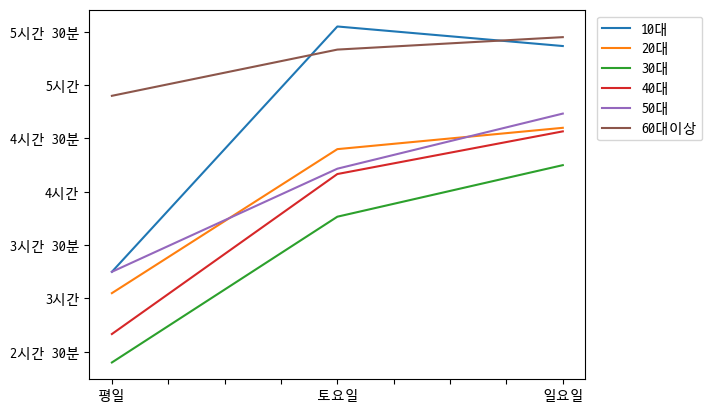

In [34]:
fig = people_activate.iloc[7::9].T.plot()

plt.legend(
    labels=['10대', '20대', '30대', '40대', '50대', '60대이상'],
    loc=1,
    bbox_to_anchor=(1.25, 1)
)

plt.yticks(
    ticks=fig.get_yticks(),
    labels=['2시간 30분', '3시간', '3시간 30분', '4시간', '4시간 30분', '5시간', '5시간 30분']
)

plt.show()

- 토요일에 여가활동을 가장 많이 하는 나이대는 5시간 33분으로 10대가 가장 높았고, 다음으로 5시간 20분으로 60세이상이 높았다. 가장 높을 것이라 예상한 20대의 여과활동시간은 4시간 24분으로 3번째에 위치했다.
<br><br>
- 일요일에 여가활동을 가장 많이 하는 나이대는 5시간 27분으로 60세이상이 가장 높았고, 다음으로 5시간 22분으로 10대가 높았다. 가장 높을 것이라 예상한 20대의 여과활동시간은 4시간 36분으로 4시간 44분 여가활동을 하는 50대 다음으로 높은 4번째에 위치했다.

In [35]:
people_activate.iloc[7::9]

,,평일,토요일,일요일
연령대별,행동분류별,,,
10~19세(10대),문화 및 여가활동,2023-05-26 03:15:00,2023-05-26 05:33:00,2023-05-26 05:22:00
20~29세(20대),문화 및 여가활동,2023-05-26 03:03:00,2023-05-26 04:24:00,2023-05-26 04:36:00
30~39세(30대),문화 및 여가활동,2023-05-26 02:24:00,2023-05-26 03:46:00,2023-05-26 04:15:00
40~49세(40대),문화 및 여가활동,2023-05-26 02:40:00,2023-05-26 04:10:00,2023-05-26 04:34:00
50~59세(50대),문화 및 여가활동,2023-05-26 03:15:00,2023-05-26 04:13:00,2023-05-26 04:44:00
60세이상,문화 및 여가활동,2023-05-26 04:54:00,2023-05-26 05:20:00,2023-05-26 05:27:00


## 가설 2. 10대가 가장 많이 이용하는 장소는 관광특구인 명동일 것이고 시간대는 점심 시간대인 12시 ~ 2시일 것이다.

In [36]:
# 장소별 요일별 시간별 데이터 추출
s_loc_df = place_df.sort_values(by=['장소', '수집일시'])
loc_weekend_10 = s_loc_df[s_loc_df.수집일시.dt.day < 22][['수집일시', '장소', '인구수', '10대']].reset_index(drop=True)

In [37]:
loc_weekend_10.tail()

,수집일시,장소,인구수,10대
1495,2023-05-21 19:00:00,홍대 관광특구,69000,15.3
1496,2023-05-21 20:00:00,홍대 관광특구,65000,14.1
1497,2023-05-21 21:00:00,홍대 관광특구,59000,12.8
1498,2023-05-21 22:00:00,홍대 관광특구,51000,11.7
1499,2023-05-21 23:00:00,홍대 관광특구,39000,11.4


In [38]:
# 주말의 장소별 10대 인구 계산
loc_weekend_10['10인구수'] = loc_weekend_10.인구수 * (loc_weekend_10['10대'] / 100)
loc_weekend_10['10인구수'] = loc_weekend_10['10인구수'].astype(int)

In [39]:
# 10대가 가장 많이 이용하는 장소 5곳 추출
g_loc_mean = loc_weekend_10.groupby('장소')['10인구수'].mean()
best_10_5 = g_loc_mean.sort_values(ascending=False)[:5].index
best_10_5

Index(['홍대 관광특구', '잠실 관광특구', '여의도', '강남역', '창동 신경제 중심지'], dtype='object', name='장소')

In [40]:
best_10_df = loc_weekend_10[loc_weekend_10.장소.isin(best_10_5)]

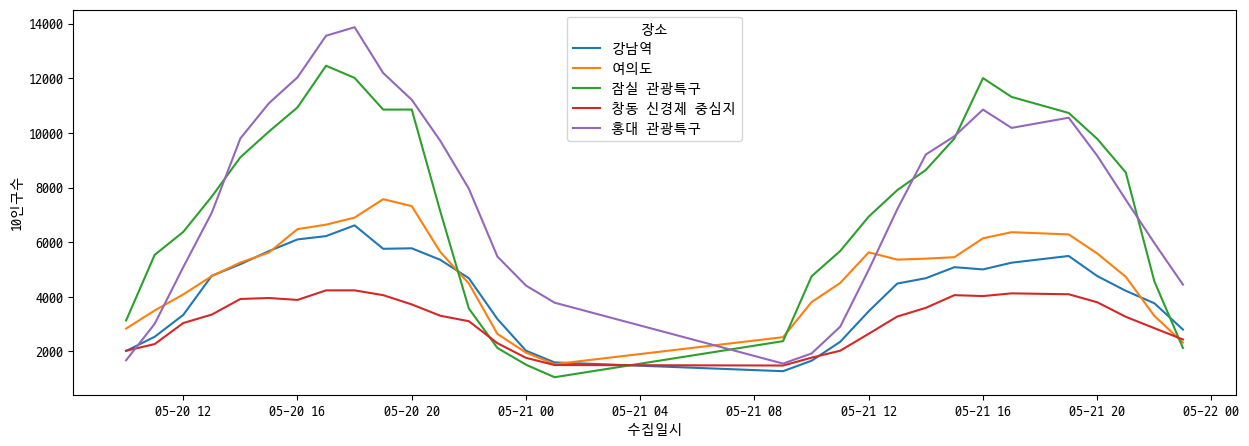

In [41]:
fig = sns.lineplot(
    data=best_10_df,
    x='수집일시',
    y='10인구수',
    hue='장소',
    errorbar=None,
)

fig.figure.set_size_inches(15,5)

- 토요일(2023-05-20)에 10대가 가장 많이 이용하는 장소는 요일당 평균인구 8,839명으로 관광특구인 홍대이고 두 번째로 많이 이용하는 장소는 요일당 평균인구 7,986명으로관광특구인 잠실이였다. 일요일(2023-05-21)에 가장 많이 이용한 장소는 요일당 평균인구 6,733명으로 잠실이이고, 두 번째로 많이 이용하는 장소는 요일당 평균인구 6,537명으로 홍대로 나타났다.

In [42]:
# 토요일 10대 인구수의 평균 상위 2개
best_10_df[best_10_df.수집일시.dt.day==20].groupby('장소')['10인구수'].mean().sort_values(ascending=False)[:2]

장소
홍대 관광특구    8839.142857
잠실 관광특구    7986.357143
Name: 10인구수, dtype: float64

In [43]:
# 일요일 10대 인구수의 평균 상위 2개
best_10_df[best_10_df.수집일시.dt.day == 21].groupby('장소')['10인구수'].mean().sort_values(ascending=False)[:2]

장소
잠실 관광특구    6733.25
홍대 관광특구    6536.75
Name: 10인구수, dtype: float64

- 토요일(2023-05-20)홍대에 10대가 가장 많은 시간은 18시로 10대 총 인구수 13,871명이 있었고, 잠실에 10대가 가장 많은 시간은 17시로 10대 총 인구수 12,460명이 있었다. 일요일(2023-05-21) 홍대에 10대가 가장 많은 시간은 16시로 10대 총 인구수 10,854명이 있었고, 잠실에 10대가 가장 많은 시간은 16시로 10대 총 인구수 12,008명이 있었다.

In [44]:
# 홍대 10대 총 인구수 최대
hong_df = best_10_df[best_10_df.장소=='홍대 관광특구']
hong_df.sort_values(by=['10인구수', '수집일시'], ascending=False).reset_index(drop=True)[0:7:6]

,수집일시,장소,인구수,10대,10인구수
0,2023-05-20 18:00:00,홍대 관광특구,97000,14.3,13871
6,2023-05-21 16:00:00,홍대 관광특구,67000,16.2,10854


In [45]:
# 잠실 10대 총 인구수 최대
zam_df = best_10_df[best_10_df.장소=='잠실 관광특구']
zam_df.sort_values(by=['10인구수', '수집일시'], ascending=False).reset_index(drop=True)[:3:2]

,수집일시,장소,인구수,10대,10인구수
0,2023-05-20 17:00:00,잠실 관광특구,89000,14.0,12460
2,2023-05-21 16:00:00,잠실 관광특구,79000,15.2,12008


- 토요일(2023-05-20) 홍대에 10대가 가장 많이 유입되는 시간은 14시로 총 인구수 9,798명 이전 시간 대비 2,718명이 증가했고 잠실은 10시로 총 인구수 3,132명 이전 시간 대비 2734명이 증가했다. 일요일(2023-05-21) 홍대에 10대가 가장 많이 유입되는 시간은 13시로 총 인구수 7,208 이전 시간 대비 2,220명이 증가했고, 잠실은 10시로 총 인구수 4,752명 이전 시간 대비 2,377명이 증가했다.

In [49]:
# 토요일 일요일의 홍대의 10대 인구수의 증감율
hong_df.loc[:,'인구증감율'] = (hong_df['10인구수'] - hong_df['10인구수'].shift()).fillna(0).astype(int)
hong_df.sort_values(by='인구증감율', ascending=False).reset_index(drop=True)[:2]

,수집일시,장소,인구수,10대,10인구수,인구증감율
0,2023-05-20 14:00:00,홍대 관광특구,71000,13.8,9798,2718
1,2023-05-21 13:00:00,홍대 관광특구,53000,13.6,7208,2220


In [50]:
# 토요일 일요일의 잠실의 10대 인구수의 증감율
zam_df.loc[:,'인구증감율'] = (zam_df['10인구수'] - zam_df['10인구수'].shift()).fillna(0).astype(int)
zam_df.sort_values(by='인구증감율', ascending=False).reset_index(drop=True)[:3:2]

,수집일시,장소,인구수,10대,10인구수,인구증감율
0,2023-05-20 11:00:00,잠실 관광특구,41000,13.5,5535,2403
2,2023-05-21 16:00:00,잠실 관광특구,79000,15.2,12008,2210


- 결론 : 10대가 가장 많을 것이라 예상한 명동은 9번째에 위치해 있었고 지역 이용 시간대를 살펴보면 토요일(2023-05-20) 홍대는 11시부터 꾸준히 증가하다 19시부터 감소하고 잠실은 10시부터 증가하다 18시에서 19시에 소폭 감소했고 21시부터 감소하는 양상을 보였다. 일요일(2023-05-21) 홍대는 10시부터 꾸준히 증가하다 16시에 소폭 감소하고 다시 20시부터 감소하고 잠실은 9시부터 증가하다 17시부터 감소하는 양상을 보인다.

## 가설 3. 6070대가 가장 많이 이용하는 장소는 관광특구인 종로,청계일 것이다. 

In [51]:
# 장소별 요일별 시간별 데이터 추출
s_loc_df = place_df.sort_values(by=['장소', '수집일시'])
loc_weekend_6070 = s_loc_df[s_loc_df.수집일시.dt.day < 22][['수집일시', '장소', '인구수', '6070대']].reset_index(drop=True)

In [52]:
loc_weekend_6070.tail()

,수집일시,장소,인구수,6070대
1495,2023-05-21 19:00:00,홍대 관광특구,69000,4.8
1496,2023-05-21 20:00:00,홍대 관광특구,65000,5.0
1497,2023-05-21 21:00:00,홍대 관광특구,59000,4.9
1498,2023-05-21 22:00:00,홍대 관광특구,51000,5.5
1499,2023-05-21 23:00:00,홍대 관광특구,39000,6.0


In [53]:
# 주말의 장소별 6070대 인구 계산
loc_weekend_6070['6070인구수'] = loc_weekend_6070.인구수 * (loc_weekend_6070['6070대'] / 100)
loc_weekend_6070['6070인구수'] = loc_weekend_6070['6070인구수'].astype(int)

In [54]:
# 6070대가 가장 많이 이용하는 장소 5곳 추출
g_loc_mean = loc_weekend_6070.groupby('장소')['6070인구수'].mean()
best_6070_5 = g_loc_mean.sort_values(ascending=False)[:5].index
best_6070_5

Index(['여의도', '창동 신경제 중심지', '잠실 관광특구', '종로·청계 관광특구', '명동 관광특구'], dtype='object', name='장소')

In [55]:
best_6070_df = loc_weekend_6070[loc_weekend_6070.장소.isin(best_6070_5)]

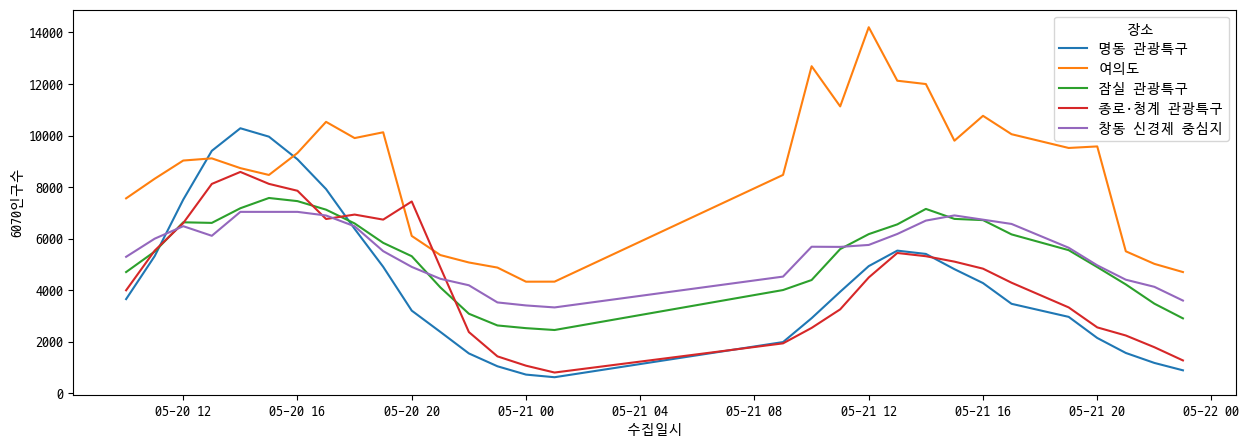

In [56]:
fig = sns.lineplot(
    data=best_6070_df,
    x='수집일시',
    y='6070인구수',
    hue='장소',
    errorbar=None,
)

fig.figure.set_size_inches(15,5)

- 토요일(2023-05-20), 일요일(2023-05-21)에 6070대가 가장 많이 이용하는 장소는 요일당 평균인구 8036명, 9012명으로 발당상권인 여의도였다, 두 번째로 많이 이용하는 장소는 토요일(2023-05-20)엔 요일당 평균인구 6096명으로 종로·청계 관광특구이고 일요일(2023-05-21)엔 5,259명으로 창동 신경제 중심지로 나타났다.

In [57]:
# 토요일 6070대 인구수의 평균 상위 2개
best_6070_df[best_6070_df.수집일시.dt.day==20].groupby('장소')['6070인구수'].mean().sort_values(ascending=False)[:2]

장소
여의도           8035.642857
종로·청계 관광특구    6095.642857
Name: 6070인구수, dtype: float64

In [58]:
# 일요일 6070대 인구수의 평균 상위 2개
best_6070_df[best_6070_df.수집일시.dt.day == 21].groupby('장소')['6070인구수'].mean().sort_values(ascending=False)[:2]

장소
여의도           9011.9375
창동 신경제 중심지    5258.8750
Name: 6070인구수, dtype: float64

- 토요일(2023-05-20) 여의도에 6070대가 가장 많은 시간은 17시로 6070대 총 인구수 10,530명이 있었고, 종로·청계에 6070대가 가장 많은 시간은 14시로 6070대 총 인구수 8,586명이 있었다. 일요일(2023-05-21) 여의도에 6070대가 가장 많은 시간은 12시로 6070대 총 인구수 14,204명이 있었고, 창동 신경제 중심지에 6070대가 가장 많은 시간은 15시로 6070대 총 인구수 6,897명이 있었다.

In [95]:
# 토요일 일요일의 여의도 6070대 총 인구수 최대
yu_df = best_6070_df[best_6070_df.장소=='여의도']
yu_df.sort_values(by=['6070인구수', '수집일시'], ascending=False).reset_index(drop=True)[:7:6]

,수집일시,장소,인구수,6070대,6070인구수
6,2023-05-20 17:00:00,여의도,81000,13.0,10530


In [97]:
# 토요일 종로·청계 6070대 총 인구수 최대
jr_df = best_6070_df[best_6070_df.장소=='종로·청계 관광특구']
jr_df.sort_values(by=['6070인구수', '수집일시'], ascending=False).reset_index(drop=True)[:1]

,수집일시,장소,인구수,6070대,6070인구수
0,2023-05-20 14:00:00,종로·청계 관광특구,31000,27.7,8586


In [94]:
# 일요일의 창동 신경제 중심지 6070대 총 인구수 최대
cd_df = best_6070_df[best_6070_df.장소=='창동 신경제 중심지']
cd_df.sort_values(by=['6070인구수', '수집일시'], ascending=False).reset_index(drop=True)[3:4]

,수집일시,장소,인구수,6070대,6070인구수
3,2023-05-21 15:00:00,창동 신경제 중심지,33000,20.9,6897


- 토요일 여의도에 6070대가 가장 많이 유입되는 시간은 17시로 6070대의 총 인구수 10,530명 이전 시간 대비 1,208명이 증가했고 종로·청계는 11시로 6070대의 총 인구수 5,529명 이전 시간 대비 1,539명이 증가했다. 일요일 여의도에 6070대가 가장 많이 유입되는 시간은 13시로 6070대 총 인구수 12,690명 이전 시간 대비 1,197명이 증가했고, 창동 신경제 중심지은 14시로 6070대 총 인구수 4,522명 이전 시간 대비 1,197명이 증가했다.

In [109]:
# 토요일 일요일의 여의도의 6070대 인구수의 증감율
yu_df.loc[:, '인구증감율'] = (yu_df['6070인구수'] - yu_df['6070인구수'].shift()).fillna(0).astype(int)
yu_df.sort_values(by='인구증감율', ascending=False).reset_index(drop=True)[:4:3]

,수집일시,장소,인구수,6070대,6070인구수,인구증감율
0,2023-05-21 10:00:00,여의도,47000,27.0,12690,4220
3,2023-05-20 17:00:00,여의도,81000,13.0,10530,1208


In [99]:
# 토요일 종로·청계의 6070대 인구수의 증감율
jr_df.loc[:, '인구증감율'] = (jr_df['6070인구수'] - jr_df['6070인구수'].shift()).fillna(0).astype(int)
jr_df.sort_values(by='인구증감율', ascending=False).reset_index(drop=True)[:1]

,수집일시,장소,인구수,6070대,6070인구수,인구증감율
0,2023-05-20 11:00:00,종로·청계 관광특구,19000,29.1,5529,1539


In [105]:
# 일요일의 창동 신경제 중심지의 6070대 인구수의 증감율
cd_df.loc[:, '인구증감율'] = (cd_df['6070인구수'] - cd_df['6070인구수'].shift()).fillna(0).astype(int)
cd_df.sort_values(by='인구증감율', ascending=False).reset_index(drop=True)[:1]

- 결론 : 10대가 가장 많을 것이라 예상한 명동은 9번째에 위치해 있었고 지역 이용 시간대를 살펴보면 토요일 홍대는 11시부터 꾸준히 증가하다 19시부터 감소하고 잠실은 10시부터 증가하다 18시에서 19시에 소폭 감소했고 21시부터 감소하는 양상을 보였다. 일요일 홍대는 10시부터 꾸준히 증가하다 16시에 소폭 감소하고 다시 20시부터 감소하고 잠실은 9시부터 증가하다 17시부터 감소하는 양상을 보인다.

- 결론 : 6070대가 가장 많을 것이라 예상한 종로·청계는 토요일 2번째, 일요일 3번째에 위치해 있었고 지역 이용 시간대를 살펴보면 토요일 여의도는 11시부터 증가하다 14시부터 15시에 소복 감소하고 16시부터 17시에 급격히 증가했고 16시 감소 17시에 소폭 증가하고 18시부터 하락했다. 종로·청계는 11시부터 증가하다 15시부터 17시까지 감소했고 18시 소폭 증가 19시 소폭 감소 20시 증가하다 21시부터 감소하는 했다. 일요일 여의도는 10시에 큰 폭으로 증가하고 11시에 감소했지만 12시에 또 큰 폭으로 증가하고 13시부터 15시까지 큰 폭으로 감소했다. 16시에 증가했지만 17시부터 다시 감소하기 시작한다. 창동 신경제 중심지는 9시부터 증가해 15시까지 증가를 유지하지만 16시부터 감소하는 양상을 보인다.

- 증감폭 그래프

In [ ]:
rate = yu_df

In [110]:
yu_df

,수집일시,장소,인구수,6070대,6070인구수,인구증감율
990,2023-05-20 10:00:00,여의도,45000,16.8,7560,0
991,2023-05-20 11:00:00,여의도,53000,15.7,8321,761
992,2023-05-20 12:00:00,여의도,61000,14.8,9028,707
993,2023-05-20 13:00:00,여의도,67000,13.6,9112,84
994,2023-05-20 14:00:00,여의도,71000,12.3,8733,-379
995,2023-05-20 15:00:00,여의도,73000,11.6,8468,-265
996,2023-05-20 16:00:00,여의도,79000,11.8,9322,854
997,2023-05-20 17:00:00,여의도,81000,13.0,10530,1208
998,2023-05-20 18:00:00,여의도,75000,13.2,9900,-630
999,2023-05-20 19:00:00,여의도,75000,13.5,10125,225


In [116]:
jr_df[jr_df.수집일시.dt.day==20]

,수집일시,장소,인구수,6070대,6070인구수,인구증감율
1380,2023-05-20 10:00:00,종로·청계 관광특구,15000,26.6,3990,0
1381,2023-05-20 11:00:00,종로·청계 관광특구,19000,29.1,5529,1539
1382,2023-05-20 12:00:00,종로·청계 관광특구,23000,28.7,6600,1071
1383,2023-05-20 13:00:00,종로·청계 관광특구,29000,28.0,8120,1520
1384,2023-05-20 14:00:00,종로·청계 관광특구,31000,27.7,8586,466
1385,2023-05-20 15:00:00,종로·청계 관광특구,31000,26.2,8122,-464
1386,2023-05-20 16:00:00,종로·청계 관광특구,33000,23.8,7854,-268
1387,2023-05-20 17:00:00,종로·청계 관광특구,31000,21.8,6758,-1096
1388,2023-05-20 18:00:00,종로·청계 관광특구,35000,19.8,6930,172
1389,2023-05-20 19:00:00,종로·청계 관광특구,37000,18.2,6734,-196


In [114]:
cd_df[cd_df.수집일시.dt.day==21]

,수집일시,장소,인구수,6070대,6070인구수,인구증감율
1454,2023-05-21 00:00:00,창동 신경제 중심지,21000,16.2,3402,-117
1455,2023-05-21 01:00:00,창동 신경제 중심지,19000,17.5,3325,-77
1456,2023-05-21 09:00:00,창동 신경제 중심지,19000,23.8,4522,1197
1457,2023-05-21 10:00:00,창동 신경제 중심지,23000,24.7,5681,1159
1458,2023-05-21 11:00:00,창동 신경제 중심지,25000,22.7,5675,-6
1459,2023-05-21 12:00:00,창동 신경제 중심지,27000,21.3,5751,76
1460,2023-05-21 13:00:00,창동 신경제 중심지,29000,21.3,6177,426
1461,2023-05-21 14:00:00,창동 신경제 중심지,31000,21.6,6696,519
1462,2023-05-21 15:00:00,창동 신경제 중심지,33000,20.9,6897,201
1463,2023-05-21 16:00:00,창동 신경제 중심지,33000,20.4,6732,-165


## 가설 4. 2030대가 가장 많이 이용하는 장소는 관광특구인 홍대일 것이다.

In [63]:
# 장소별 요일별 시간별 데이터 추출
s_loc_df = place_df.sort_values(by=['장소', '수집일시'])
loc_weekend_2030 = s_loc_df[s_loc_df.수집일시.dt.day < 22][['수집일시', '장소', '인구수', '2030대']].reset_index(drop=True)

In [64]:
loc_weekend_2030.tail()

,수집일시,장소,인구수,2030대
1495,2023-05-21 19:00:00,홍대 관광특구,69000,64.4
1496,2023-05-21 20:00:00,홍대 관광특구,65000,65.8
1497,2023-05-21 21:00:00,홍대 관광특구,59000,67.4
1498,2023-05-21 22:00:00,홍대 관광특구,51000,67.7
1499,2023-05-21 23:00:00,홍대 관광특구,39000,67.5


In [66]:
# 주말의 장소별 10대 인구 계산
loc_weekend_2030['2030인구수'] = loc_weekend_2030.인구수 * (loc_weekend_2030['2030대'] / 100)
loc_weekend_2030['2030인구수'] = loc_weekend_2030['2030인구수'].astype(int)

In [67]:
# 주말의 시간별 인구 증감률 컬럼 추가
loc_weekend_2030['인구증감률'] = loc_weekend_2030['2030인구수'] - loc_weekend_2030['2030인구수'].shift()
loc_weekend_2030[:5]

,수집일시,장소,인구수,2030대,2030인구수,인구증감률
0,2023-05-20 10:00:00,DMC(디지털미디어시티),11000,48.4,5324,NaN
1,2023-05-20 11:00:00,DMC(디지털미디어시티),11000,48.4,5324,0.0
2,2023-05-20 12:00:00,DMC(디지털미디어시티),13000,49.8,6474,1150.0
3,2023-05-20 13:00:00,DMC(디지털미디어시티),15000,52.0,7800,1326.0
4,2023-05-20 14:00:00,DMC(디지털미디어시티),13000,51.0,6630,-1170.0


In [68]:
# 결측치 처리, dtype 변경
loc_weekend_2030.인구증감률 = loc_weekend_2030.인구증감률.fillna(0).astype(int)
loc_weekend_2030[:5]

,수집일시,장소,인구수,2030대,2030인구수,인구증감률
0,2023-05-20 10:00:00,DMC(디지털미디어시티),11000,48.4,5324,0
1,2023-05-20 11:00:00,DMC(디지털미디어시티),11000,48.4,5324,0
2,2023-05-20 12:00:00,DMC(디지털미디어시티),13000,49.8,6474,1150
3,2023-05-20 13:00:00,DMC(디지털미디어시티),15000,52.0,7800,1326
4,2023-05-20 14:00:00,DMC(디지털미디어시티),13000,51.0,6630,-1170


In [69]:
# 10대가 가장 많이 이용하는 장소 5곳 추출
g_loc_mean = loc_weekend_2030.groupby('장소')['2030인구수'].mean()
best_2030_5 = g_loc_mean.sort_values(ascending=False)[:5].index
best_2030_5

Index(['홍대 관광특구', '잠실 관광특구', '강남역', '여의도', '신촌·이대역'], dtype='object', name='장소')

In [71]:
best_2030_df = loc_weekend_2030[loc_weekend_2030.장소.isin(best_2030_5)]

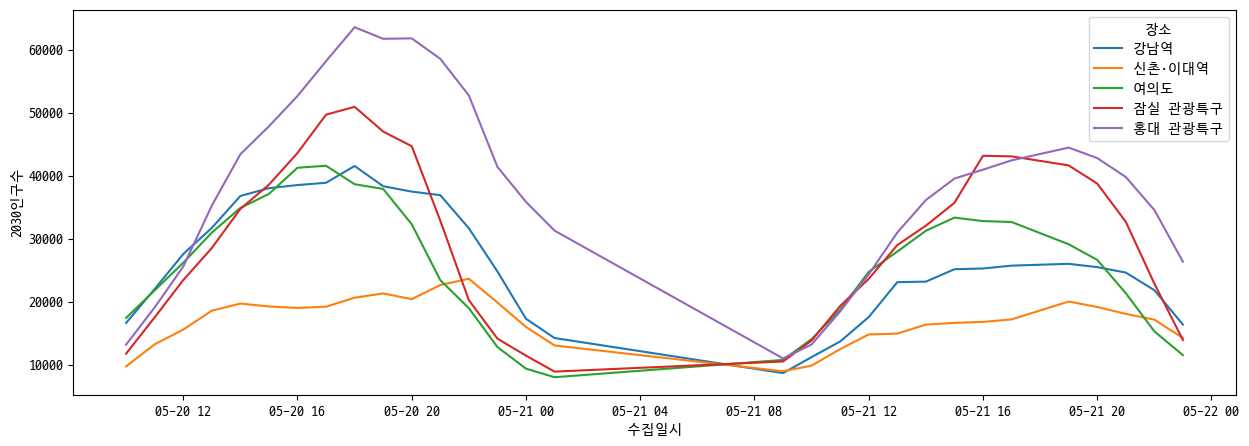

In [72]:
fig = sns.lineplot(
    data=best_2030_df,
    x='수집일시',
    y='2030인구수',
    hue='장소',
    errorbar=None,
)

fig.figure.set_size_inches(15,5)

- 토요일(2023-05-20)에 10대가 가장 많이 이용하는 장소는 요일당 평균인구 8,839명으로 관광특구인 홍대이고 두 번째로 많이 이용하는 장소는 요일당 평균인구 7,986명으로관광특구인 잠실이였다. 일요일(2023-05-21)에 가장 많이 이용한 장소는 요일당 평균인구 6,733명으로 잠실이이고, 두 번째로 많이 이용하는 장소는 요일당 평균인구 6,537명으로 홍대로 나타났다.

- 토요일(2023-05-20)홍대에 10대가 가장 많은 시간은 18시로 10대 총 인구수 13,871명이 있었고, 잠실에 10대가 가장 많은 시간은 17시로 10대 총 인구수 12,460명이 있었다. 일요일(2023-05-21) 홍대에 10대가 가장 많은 시간은 16시로 10대 총 인구수 10,854명이 있었고, 잠실에 10대가 가장 많은 시간은 16시로 10대 총 인구수 12,008명이 있었다.

- 토요일(2023-05-20) 홍대에 10대가 가장 많이 유입되는 시간은 14시로 총 인구수 9,798명 이전 시간 대비 2,718명이 증가했고 잠실은 10시로 총 인구수 3,132명 이전 시간 대비 2734명이 증가했다. 일요일(2023-05-21) 홍대에 10대가 가장 많이 유입되는 시간은 13시로 총 인구수 7,208 이전 시간 대비 2,220명이 증가했고, 잠실은 10시로 총 인구수 4,752명 이전 시간 대비 2,377명이 증가했다.

- 결론 : 10대가 가장 많을 것이라 예상한 명동은 9번째에 위치해 있었고 지역 이용 시간대를 살펴보면 토요일(2023-05-20) 홍대는 11시부터 꾸준히 증가하다 19시부터 감소하고 잠실은 10시부터 증가하다 18시에서 19시에 소폭 감소했고 21시부터 감소하는 양상을 보였다. 일요일(2023-05-21) 홍대는 10시부터 꾸준히 증가하다 16시에 소폭 감소하고 다시 20시부터 감소하고 잠실은 9시부터 증가하다 17시부터 감소하는 양상을 보인다.

In [ ]:
best_10_df[best_10_df.장소.isin(['홍대 관광특구', '잠실 관광특구'])].sort_values(by='10인구수', ascending=False)[:10]

In [ ]:
best_10_df[best_10_df.장소.isin(['홍대 관광특구', '잠실 관광특구'])].sort_values(by='인구증감률', ascending=False)[:5]

In [ ]:
best_10_df[best_10_df.장소.isin(['홍대 관광특구', '잠실 관광특구'])]

- 잠실 : 롯데월드
- 